# Statistical Inference of Luminosity and Temperature of Dwarf Stars

In [ ]:
library(tidyverse)
library(infer)
library(gridExtra)

## Introduction

Stars are typically classified into four different groups – white dwarfs, main sequence, giants, and supergiants (Chiosi). A typical star will become a main sequence star and then end its lifecycle as a white dwarf, these are the most common stars (“Main Sequence Stars: Definition & Life Cycle.” ). Red dwarfs are not a type of white dwarf, rather they are a type of small main sequence star that is not very bright. Another type of dwarf is a brown dwarf. These are not usually classified as stars because they do not burn hot enough (“Red Dwarfs: The Most Common and Longest-Lived Stars.”). White dwarfs are very small dense stars that are not very bright when compared to main sequence stars (Koester). When a massive star is formed it will become a giant star or a supergiant and then end its lifecycle as a neutron star or a blackhole. Giants and supergiants are very large stars (with supergiant being even larger) that shine very bright when compared to main sequence stars (Chiosi). 

In this project we want to determine if there is a difference in luminosity and temperature between red, brown, and white dwarfs. Our location parameter is the mean of luminosity and temperature and our scale parameter is the standard deviation of both luminosity and temperature.

The dataset that are using has the following variables

| Variable | Description |
| :-: | :-: |
| Absolute Temperature (K) | The temperature of the star in Kelvin |
| Relative Luminosity (L/Lo) | The luminosity of the star when divided by the average luminosity of the sun (3.828 x 10^26 Watts) |
| Relative Radius (R/Ro) | The radius of the star when divided by the average radius of the sun (6.9551 x 10^8 m) |
| Absolute Magnitude (Mv) | The absolute magnitude of the star |
| Star Color | The color of the star |
| Spectral Class (O,B,A,F,G,K,M) | If the star is a main sequence star, the type of main sequence star it is |
| Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants) | The type of star it is | 

## Preliminary Analysis

### Reading the dataset into R

In [ ]:
stars <- read.csv("6-class.csv")

glimpse(stars)

### Cleaning and Wrangling

In [32]:
# change 'Star.type' to type 'factor' so that it can be treated as a categorical variable

stars <- mutate(stars, Star.type = as_factor(Star.type))

In [33]:
# Filtering out the 'Giant' stars 

dwarfs <- stars %>%
filter(Star.type != 5) %>%
filter(Star.type != 4) %>%
filter(Star.type != 3)


### Visualizations

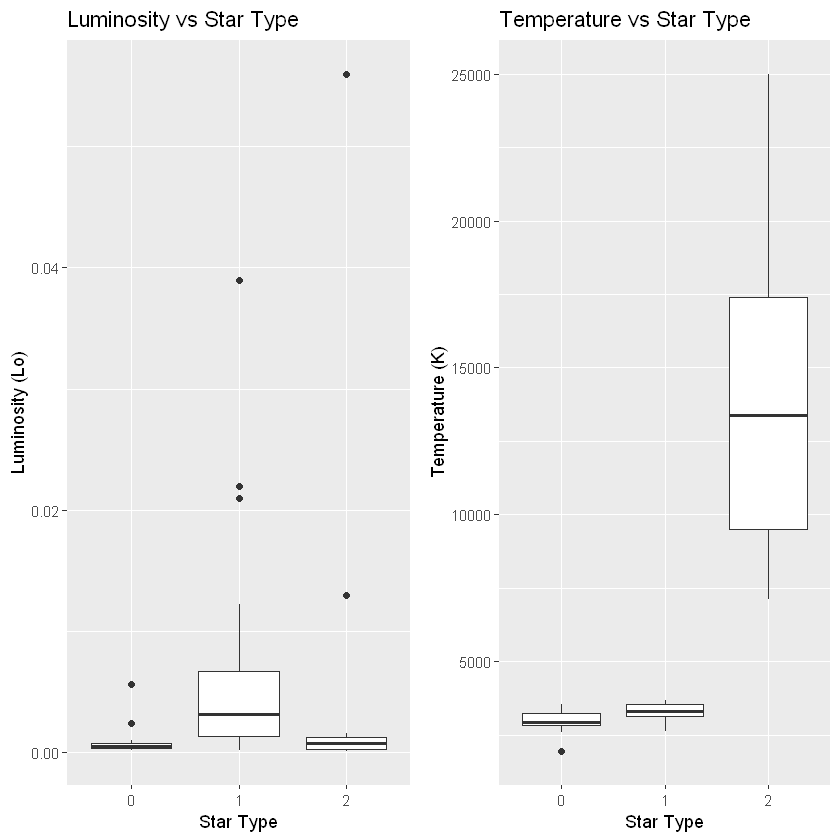

In [48]:
# Creating boxplots to show the variation in luminosity and temperature across star types

L_box <- ggplot(dwarfs, aes(x = Star.type, y = Luminosity.L.Lo.)) + geom_boxplot() + ggtitle("Luminosity vs Star Type") + xlab("Star Type") + ylab("Luminosity (Lo)")
T_box <- ggplot(dwarfs, aes(x = Star.type, y = Temperature..K.)) + geom_boxplot() +  ggtitle("Temperature vs Star Type") +  xlab("Star Type") + ylab("Temperature (K)")
grid.arrange(L_box, T_box, ncol=2)

In [35]:
# Isolate each dwarf star type

type_0 <- filter(stars, Star.type == 0)
type_1 <- filter(stars, Star.type == 1)
type_2 <- filter(stars, Star.type == 2)

#### Brown Dwarf Distributions

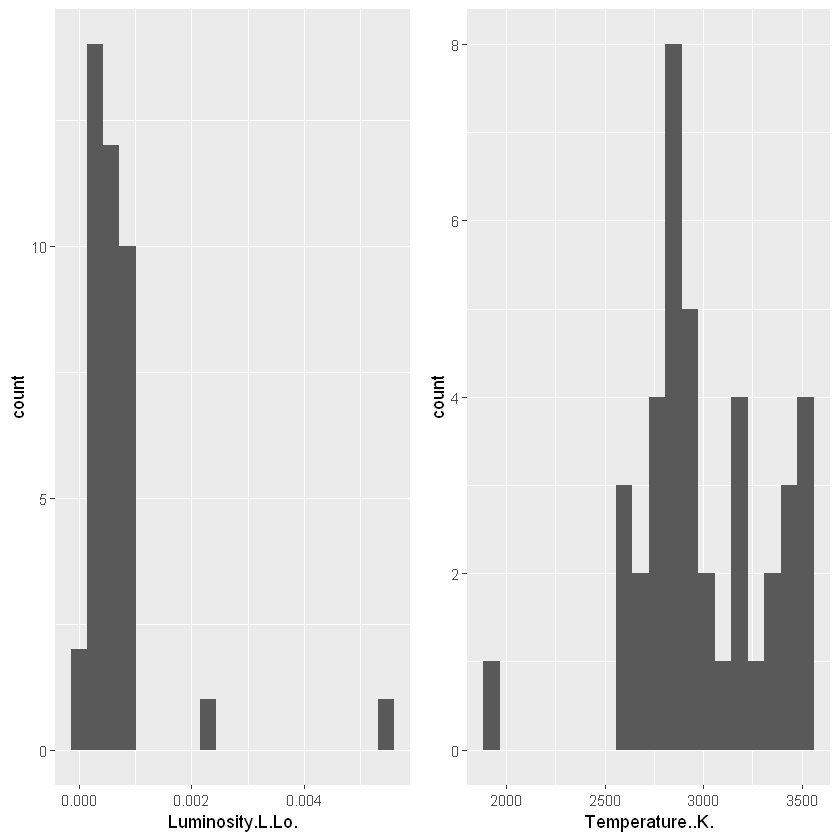

In [36]:
# Find the distribution of luminosity and temperature values for the brown dwarf star

L_0 <- ggplot(type_0, aes(x = Luminosity.L.Lo.)) + geom_histogram(bins = 20)
T_0 <- ggplot(type_0, aes(x = Temperature..K.)) + geom_histogram(bins = 20)
grid.arrange(L_0, T_0, ncol=2)

#### Red Dwarf Distributions

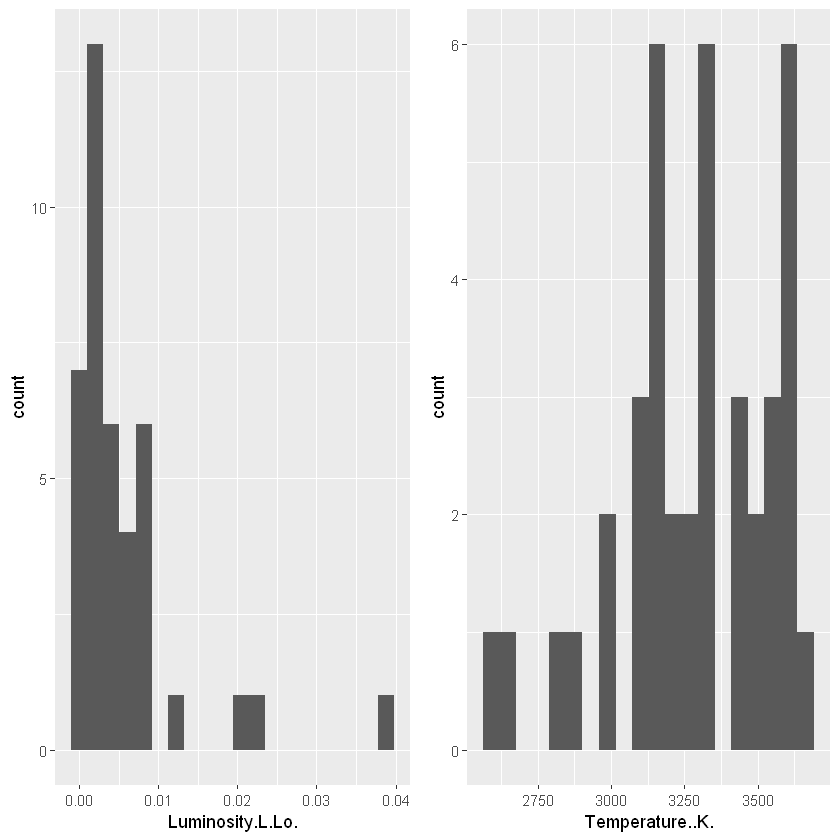

In [37]:
# Find the distribution of luminosity and temperature values for the red dwarf star

L_1 <- ggplot(type_1, aes(x = Luminosity.L.Lo.)) + geom_histogram(bins = 20)
T_1 <- ggplot(type_1, aes(x = Temperature..K.)) + geom_histogram(bins = 20)
grid.arrange(L_1, T_1, ncol=2)

#### White Dwarf Distributions

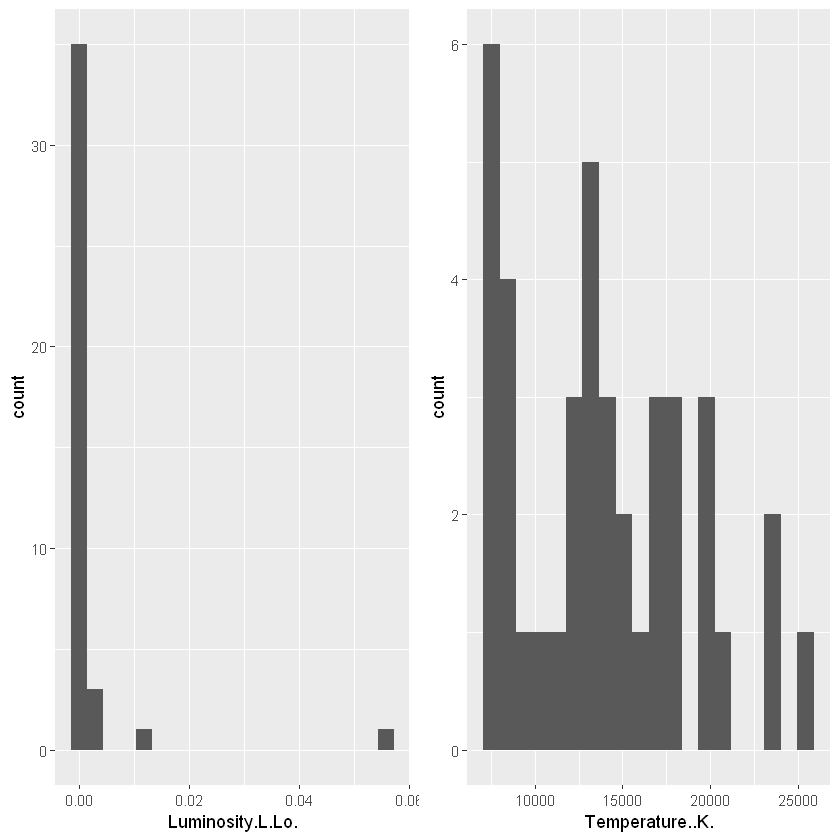

In [38]:
# Find the distribution of luminosity and temperature values for the white dwarf star

L_2 <- ggplot(type_2, aes(x = Luminosity.L.Lo.)) + geom_histogram(bins = 20)
T_2 <- ggplot(type_2, aes(x = Temperature..K.)) + geom_histogram(bins = 20)
grid.arrange(L_2, T_2, ncol=2)

### Computing Parameter Estimates

#### Brown Star Estimates

In [56]:
# Finding the mean and standard deviation of the luminosity and temperature of the brown star

brown_dwarf_stats <- type_0 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "Brown", .before = "mean_lum")

brown_dwarf_stats

Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Brown,0.000693275,0.0008879057,2997.95,332.2763


In [54]:
# Finding the mean and standard deviation of the luminosity and temperature of the red star

red_dwarf_stats <- type_1 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "Red", .before = "mean_lum")

red_dwarf_stats

Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Red,0.00540575,0.00733024,3283.825,269.6373


In [55]:
# Finding the mean and standard deviation of the luminosity and temperature of the white star

white_dwarf_stats <- type_2 %>% 
    summarise(mean_lum = mean(Luminosity.L.Lo.), 
              sd_lum = sd(Luminosity.L.Lo.),
              mean_temp = mean(Temperature..K.),
              sd_temp = sd(Temperature..K.)) %>%
    add_column(Type = "White", .before = "mean_lum")

white_dwarf_stats

Type,mean_lum,sd_lum,mean_temp,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
White,0.002433625,0.008912496,13931.45,4957.655


In [39]:
# Combining all parameter estimates together

parameter_estimates <- rbind(brown_dwarf_stats, red_dwarf_stats, white_dwarf_stats)
parameter_estimates

Type,mean_lum,mean_temp,sd_lum,sd_temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Brown,0.000693275,2997.950,0.0008879057,332.2763
Red,0.005405750,3283.825,0.0073302401,269.6373
White,0.002433625,13931.450,0.0089124960,4957.6552


## Methods: Plan

This report is trustworthy because the dataset that we use is fairly large, so it is potentially very representative of the true population. Therefore the mean estimates that we have calculated can be good starting points to create confidence intervals for our population parameters. While our estimations are a good starting point, they are not enough to present to a stakeholder. The plots would be a better representation if we were to do some further data processing like bootstrapping or asymptotic testing. Additionally there is no way to estimate the sampling variability of the population of stars by examining point estimates of the standard deviation, or the distribution of values of the dataset. 

In order to address the gap we brought up above, we need to bootstrap to more closely approximate the actual distribution, and by extension find a range of possible parameter estimates as opposed to a point estimate.
In the final report, we expect to find whether we are confident to say there is a difference in the luminosity and temperature between dwarf stars. We will express our result and the uncertainty in a trustworthy way. We believe finding this clarifies the difference in some features between different types of dwarf stars, and further increases the accuracy and reliability of star classification. This analysis leads to future questions such as “is there a difference in the magnitude between dwarf stars”. Additionally we can use these results to infer real astronomical observations.



## Citation

Chiosi, Cesare, Gianpaolo Bertelli, and Alessandro Bressan. "New developments in understanding the HR diagram." Annual review of astronomy and astrophysics 30.1 (1992): 235-285.

Koester, Detlev, and Ganesar Chanmugam. "Physics of white dwarf stars." Reports on Progress in Physics 53.7 (1990): 837.

Tillman, Nola Taylor, and Ben Biggs. “Main Sequence Stars: Definition & Life Cycle.” Space.com, Space, 26 Jan. 2022, https://www.space.com/22437-main-sequence-star.html. 

Tillman, Nola Taylor. “Red Dwarfs: The Most Common and Longest-Lived Stars.” Space.com, Space, 6 June 2019, https://www.space.com/23772-red-dwarf-stars.html. 